In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

C:\Users\kirti\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df =  pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_184.csv', skiprows = 4)

In [4]:
df1 = df[(df['Country Name'] == 'United States') | (df['Country Name'] == 'Canada')]

In [5]:
df1.reset_index(inplace = True)

In [6]:
df1.drop(labels = ['Unnamed: 67','index'], axis = 1, inplace = True)

C:\Users\kirti\AppData\Local\Temp\ipykernel_712\457666178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(labels = ['Unnamed: 67','index'], axis = 1, inplace = True)


In [7]:
df1 = pd.pivot_table(df1,columns = 'Country Name')

In [8]:
df1.index = df1.index.astype('int')

In [10]:
year = df.columns[4:67]


df_PerCapita_Global_Avg = pd.DataFrame(index = year)
df_PerCapita_Global_Avg['Data'] = 0

for x in year:
    df_PerCapita_Global_Avg.loc[x] = df[x].mean()

In [11]:
df_PerCapita_Global_Avg.loc['1960']

Data    483.938875
Name: 1960, dtype: float64

In [12]:
df_PerCapita_Global_Avg.index = df_PerCapita_Global_Avg.index.astype('int')

In [14]:
df_2 =  pd.read_csv('API_NY.GDP.PCAP.KD.ZG_DS2_en_csv_v2_146.csv', skiprows = 4)
df_3 =  df_2[(df_2['Country Name'] == 'United States') | (df_2['Country Name'] == 'Canada')]

In [15]:
df_3.drop(labels = ['Unnamed: 67'], axis = 1, inplace = True)

C:\Users\kirti\AppData\Local\Temp\ipykernel_712\2352906609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.drop(labels = ['Unnamed: 67'], axis = 1, inplace = True)


In [16]:
df_4 = pd.pivot_table(data = df_3 ,columns = 'Country Name')

In [17]:
df_4.index = df_4.index.astype('int')

<IPython.core.display.Javascript object>


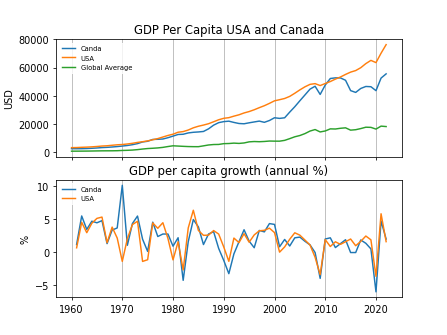

In [18]:
fig1, (ax1,ax2)  = plt.subplots(2,1, sharex = True)

ax1.plot(df1.index, df1['Canada'], label = 'Canda')
ax1.plot(df1.index, df1['United States'], label = 'USA')
ax1.plot(df_PerCapita_Global_Avg.index,df_PerCapita_Global_Avg['Data'], label = 'Global Average')

ax1.set_ylabel('USD')
ax1.set_title("GDP Per Capita USA and Canada")
#ax1.set_xticks([])
ax1.legend(loc = 2,edgecolor  = 'white',fontsize  = 'x-small')
ax1.grid(visible=True, axis='x', which='major')

ax2.plot(df_4.index,df_4['Canada'],label = 'Canda')
ax2.plot(df_4.index,df_4['United States'],label = 'USA')
ax2.set_ylabel('%')
ax2.set_title("GDP per capita growth (annual %)")
ax2.legend(loc = 2, edgecolor  = 'white',fontsize  = 'x-small')
ax2.grid(visible=True, axis='x', which='major')

plt.show()